In [1]:
import itertools
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 100)
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('joined_data_life.csv', index_col=0)

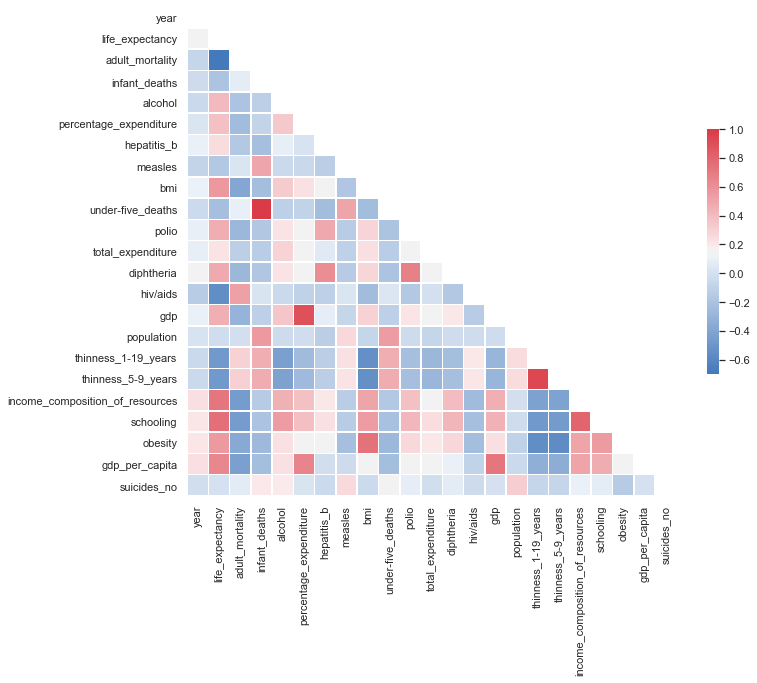

In [3]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df.corr(), dropDuplicates = True)

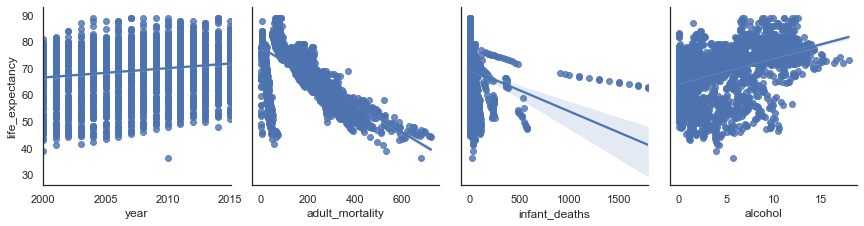

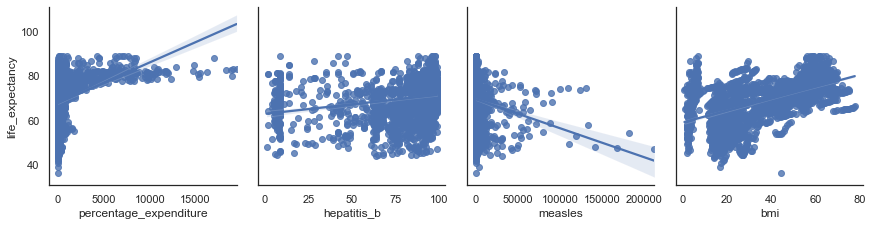

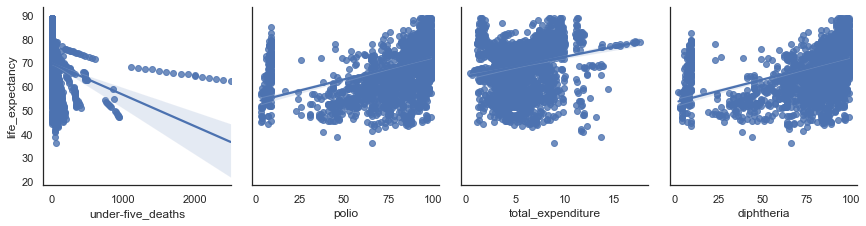

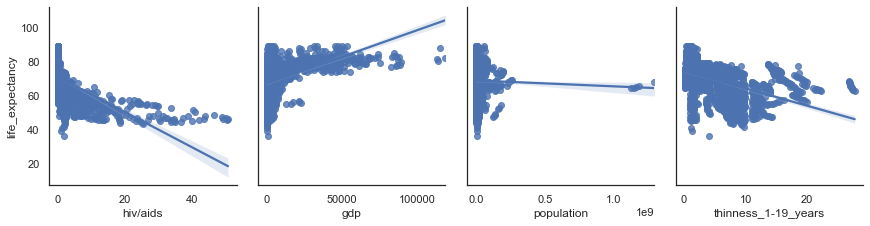

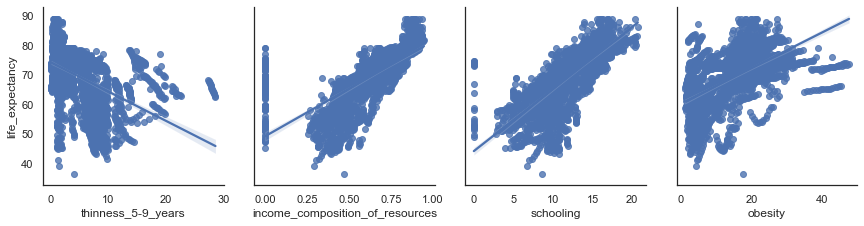

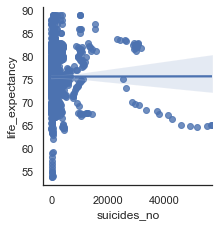

In [4]:
features = ['year', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling', 'obesity', 'suicides_no']
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['life_expectancy'],x_vars=i, kind="reg", height=3)

In [5]:
ols('life_expectancy~obesity',data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     1180.
Date:                Sun, 21 Jun 2020   Prob (F-statistic):          5.41e-213
Time:                        01:02:10   Log-Likelihood:                -8916.2
No. Observations:                2560   AIC:                         1.784e+04
Df Residuals:                    2558   BIC:                         1.785e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.0747      0.312    192.494      0.000      59.463      60.687
obesity        0.6067      0.018     34.353      0.000       0.572       0.641
==============================================================================
Omnibus:                       46.430   Durbin-Watson:                   0.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.145
Skew:                          -0.315   Prob(JB):                     2.13e-11
Kurtosis:                       3.252   Cond. No.                         35.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
ols('life_expectancy~schooling+obesity+gdp+alcohol+income_composition_of_resources+percentage_expenditure',data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     683.8
Date:                Sun, 21 Jun 2020   Prob (F-statistic):               0.00
Time:                        01:02:10   Log-Likelihood:                -7274.7
No. Observations:                2296   AIC:                         1.456e+04
Df Residuals:                    2289   BIC:                         1.460e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          44.6493      0.493     90.483      0.000      43.682      45.617
schooling                           1.1301      0.069     16.476      0.000       0.996       1.265
obesity                             0.1734      0.017     10.043      0.000       0.140       0.207
gdp                              4.322e-05   2.18e-05      1.981      0.048    4.38e-07     8.6e-05
alcohol                            -0.1307      0.037     -3.538      0.000      -0.203      -0.058
income_composition_of_resources    13.4914      0.946     14.264      0.000      11.637      15.346
percentage_expenditure              0.0003      0.000      2.033      0.042    1.03e-05       0.001
==============================================================================
Omnibus:                      184.746   Durbin-Watson:                   0.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              878.385
Skew:                          -0.219   Prob(JB):                    1.82e-191
Kurtosis:                       5.998   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
#Dropping the null values for the features we're using and target
df.dropna(subset=['life_expectancy', 'schooling', 'obesity', 'alcohol', 'income_composition_of_resources', 'diphtheria', 'percentage_expenditure', 'hepatitis_b', 'population'],inplace=True)

In [8]:
countries_dummy = pd.get_dummies(df.country, prefix='country')
years_dummy = pd.get_dummies(df.year, prefix='year')
status_dummy = pd.get_dummies(df.status, prefix='status')
df = pd.concat([df, countries_dummy, years_dummy, status_dummy], axis=1)

In [9]:
columns = list(df)
cols_country = []
for x in range(0,len(columns)):
    if 'country_' in columns[x]:
        cols_country.append(columns[x])

In [10]:
columns = list(df)
cols_year = []
for x in range(0,len(columns)):
    if 'year_' in columns[x]:
        cols_year.append(columns[x])

In [11]:
df.head(2)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,obesity,gdp_per_capita,suicides_no,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bangladesh,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bhutan,country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cabo Verde,country_Cambodia,country_Cameroon,country_Canada,country_Central African Republic,country_Chad,country_Chile,country_China,country_Colombia,country_Comoros,country_Costa Rica,country_Croatia,country_Cyprus,country_Djibouti,country_Dominican Republic,country_Ecuador,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Fiji,country_France,country_Gabon,country_Georgia,country_Germany,country_Ghana,country_Greece,country_Guatemala,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Haiti,country_Honduras,country_India,country_Indonesia,country_Iraq,country_Ireland,country_Israel,country_Italy,country_Jamaica,country_Jordan,country_Kazakhstan,country_Kenya,country_Kiribati,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Lithuania,country_Luxembourg,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Mauritania,country_Mauritius,country_Mexico,country_Mongolia,country_Montenegro,country_Morocco,country_Mozambique,country_Myanmar,country_Namibia,country_Nepal,country_Netherlands,country_Nicaragua,country_Niger,country_Nigeria,country_Pakistan,country_Panama,country_Papua New Guinea,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Romania,country_Russian Federation,country_Rwanda,country_Samoa,country_Sao Tome and Principe,country_Senegal,country_Serbia,country_Seychelles,country_Sierra Leone,country_Solomon Islands,country_South Africa,country_Spain,country_Sri Lanka,country_Suriname,country_Sweden,country_Syrian Arab Republic,country_Tajikistan,country_Thailand,country_Timor-Leste,country_Togo,country_Tonga,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Uganda,country_Ukraine,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Zambia,country_Zimbabwe,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,status_Developed,status_Developing
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,5.2,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,4.9,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


# Running model with 'countries' in model

In [12]:
subsets=[
          'schooling', 'obesity', 'alcohol', 'income_composition_of_resources', 'diphtheria', 'percentage_expenditure', 
    'hepatitis_b', 'polio', 'population'
        ]
features = subsets +cols_country[1:]
#  +cols_country[1:]
df_features = df[features]
target = df['life_expectancy']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.20)

In [14]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [15]:
#instantiate a linear regression object
target_std = target.std()
lm = LinearRegression()
#fit the linear regression to the data
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('Training Root Mean Squared Error:' , train_rmse)
print ("R^2 Score:", lm.score(X_train, y_train))
# print('Mean Absolute Error Z:', test_mae/target_std )

Training Root Mean Squared Error: 1.8841325254821504
R^2 Score: 0.9520837992225618


In [16]:
y_pred = lm.predict(X_test)
#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Testing Root Mean Squared Error:' , test_rmse)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))
target_std = target.std()
print('Root Mean Squared Error Z:' , test_rmse/target_std)

Testing Root Mean Squared Error: 2.1735426559272533
Training:  1 vs. Testing:  2
Root Mean Squared Error Z: 0.25203269010772716


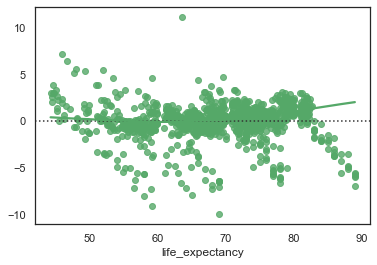

In [17]:
sns.residplot( y_train, y_train_pred,lowess=True, color="g")

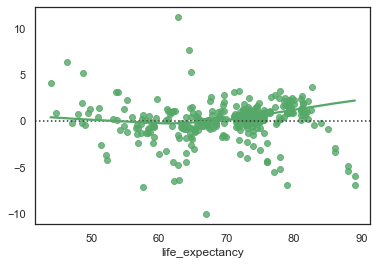

In [18]:
sns.residplot( y_test, y_pred, lowess=True, color="g")

# Running Model with scaled features without 'countries'

In [19]:
#LOG AND SQUARE ROOT TRANSFORMATIONS to linearize data
df['percentage_expenditure_log'] = df['percentage_expenditure'].map(lambda x: np.log(x))
df['hepatitis_b_log'] = df['hepatitis_b'].map(lambda x: np.log(x)) #This is categorical, so can'y
df['obesity_log'] = df['obesity'].map(lambda x: np.log(x))
df['gdp_log'] = df['gdp'].map(lambda x: np.log(x))
# df['grade_log'] = df['grade'].map(lambda x: np.log(x))

C:\Users\All PC\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [47]:
subsets=[
          'schooling', 'obesity', 'alcohol', 'income_composition_of_resources', 'diphtheria', 'percentage_expenditure'
        ]
features = subsets 
#  +cols_country[1:]
df_features = df[features]
target = df['life_expectancy']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.20)

In [49]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [50]:
#instantiate a linear regression object
target_std = target.std()
lm = LinearRegression()
#fit the linear regression to the data
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('Training Root Mean Squared Error:' , train_rmse)
print ("R^2 Score:", lm.score(X_train, y_train))
# print('Mean Absolute Error Z:', test_mae/target_std )

Training Root Mean Squared Error: 5.273987747865863
R^2 Score: 0.6245624427542483


In [51]:
y_pred = lm.predict(X_test)
#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Testing Root Mean Squared Error:' , test_rmse)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))
print('Root Mean Squared Error Z:' , test_rmse/target_std)

Testing Root Mean Squared Error: 5.210742597015119
Training:  5 vs. Testing:  5
Root Mean Squared Error Z: 0.6042105824807881


In [ ]:
sns.pairplot(data=df, y_vars=['life_expectancy'],x_vars=['hepatitis_b'], kind="reg", height=3)

In [ ]:
df.hepatitis_b_log.describe()

# F Test

In [35]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=15)

selector.fit(X_train, y_train)

SelectKBest(k=15, score_func=<function f_regression at 0x0000022C516D8D38>)

In [36]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [38]:
list(selected_columns)

['schooling',
 'obesity',
 'alcohol',
 'income_composition_of_resources',
 'diphtheria',
 'percentage_expenditure',
 'country_Australia',
 'country_Botswana',
 'country_Lesotho',
 'country_Malawi',
 'country_Mali',
 'country_Mozambique',
 'country_Nigeria',
 'country_Sierra Leone',
 'country_Zimbabwe']

In [39]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)


print('Original: ', test_rmse, "vs. KBest: ", testK_rmse)

Training Root Mean Squared Error: 4.310433721938098
Testing Root Mean Squared Error: 4.4287179043444596
Original:  2.187511050362392 vs. KBest:  4.4287179043444596


# Wrapper Methods

In [28]:
from sklearn.feature_selection import RFECV

In [29]:
ols = linear_model.LinearRegression()

In [40]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=10, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)



RFECV(cv=10,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [41]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]


In [42]:
len(list(selected_rfe))

136

In [43]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


print('Original: ', test_rmse, "vs. KBest: ", testK_rmse, "vs. RFE: ", testRFE_rmse)

Training Root Mean Squared Error: 1.886470114443935
Testing Root Mean Squared Error: 2.1875694777646744
Original:  2.187511050362392 vs. KBest:  4.4287179043444596 vs. RFE:  2.1875694777646744


# Lasso

In [44]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )




Training Error: 1.2298277175394539
Testing Error: 2.2366784786802407


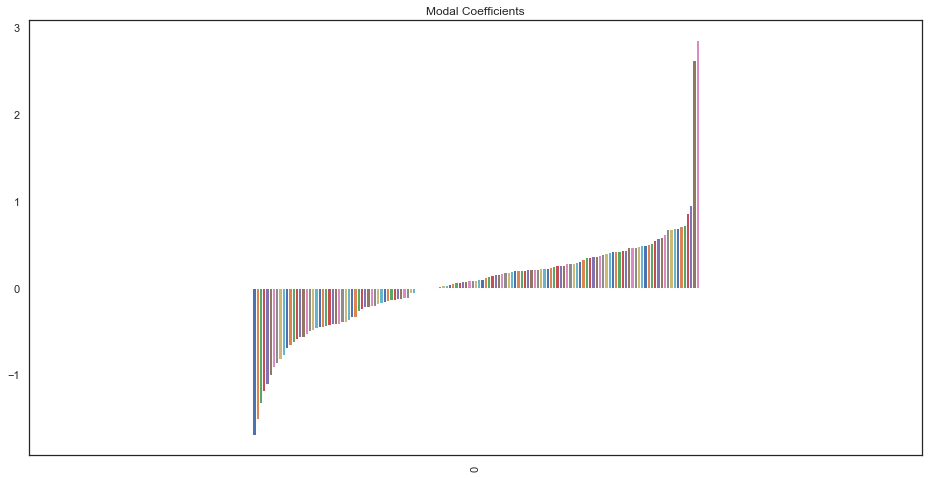

In [45]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [46]:
## training the model
from sklearn.linear_model import Lasso

lasso1 = Lasso(alpha=.1, normalize=False)

lasso1.fit(X_train,y_train)

y_train_lasso1 = lasso1.predict(X_train)
y_pred_lasso1 = lasso1.predict(X_test)

train_rmse_lasso1 = metrics.mean_absolute_error(y_train, y_train_lasso1)
test_rmse_lasso1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso1))
print('Training Error: '+ str(train_rmse_lasso1) )
print('Testing Error: '+ str(test_rmse_lasso1) )



Training Error: 1.6739861302919699
Testing Error: 2.5059432167561857
